In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
colomn_to_drop=['PassengerId','Name','Ticket','Cabin','Embarked']

In [6]:
data_clean=data.drop(colomn_to_drop,axis=1)

In [7]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
data_clean['Sex']=le.fit_transform(data_clean['Sex'])

In [10]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [12]:
data_clean=data_clean.fillna(data_clean['Age'].mean())

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [14]:
# use imputer class also

In [15]:
data_clean.loc[1][1]

1.0

In [16]:
input_cols=['Pclass','Sex','Age','SibSp','Parch','Fare']
output_cols=['Survived']
X=data_clean[input_cols]
Y=data_clean[output_cols]
print(X.shape,Y.shape)

(891, 6) (891, 1)


In [17]:
#define entopy and information gain

In [18]:
def entropy(col):
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    ent=0.0
    for ix in counts[1]:
        p=ix/N
        ent+=(-1.0*p*np.log2(p))
    return ent

In [19]:
col=np.array([1,1,0,1])
print(entropy(col))

0.8112781244591328


In [20]:
def divide_data(x_data,fkey,fval):
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val=x_data[fkey].loc[ix]
        
        if val>fval:
            x_right=x_right.append(x_data.loc[ix])
        else:
            x_left=x_left.append(x_data.loc[ix])
    
    return x_left,x_right

In [21]:
#left,right=divide_data(data_clean[:10],'Sex',0.5)
#print(left)
#print(right)

In [22]:
def info_gain(x_data,fkey,fval):
    
    left,right=divide_data(x_data,fkey,fval)
    
    #% of samples are on left and right
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    #All examle comes to one side!
    if left.shape[0]==0 or right.shape[0]==0:
        return -100000
    
    i_gain=entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [23]:
# test our function
for fx in X.columns:
    print(fx)
    print(info_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [24]:
class DecisionTree:
    
    #constructure
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.max_depth=max_depth
        self.depth=depth
        self.target=None
    
    def train(self,X_train):
        
        features=['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains=[]
        
        for ix in features:
            
            i_gain=info_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
        
        self.fkey=features[np.argmax(info_gains)]
        self.fval=X_train[self.fkey].mean()
        print("Making Tree Features is:",self.fkey)
        
        #split Data
        data_left,data_rigth=divide_data(X_train,self.fkey,self.fval)
        data_left=data_left.reset_index(drop=True)
        data_right=data_rigth.reset_index(drop=True)
        
        #truly a leaf node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.Survived.mean()>=0.5:
                self.target='Survive'
            else:
                self.target="Dead"
            return
        
        #stop early when depth >=max depth
        if (self.depth>=self.max_depth):
            if X_train.Survived.mean()>=0.5:
                self.target='Survive'
            else:
                self.target="Dead"
            return
        #recursive case
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #you can set the target at every node
        if X_train.Survived.mean()>=0.5:
            self.target='Survive'
        else:
            self.target="Dead"
        return

    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
         

In [25]:
d=DecisionTree()
#d.train(data_clean)
#d.predict(x_train)

# train-Validation-test Set split


In [26]:
split=int(0.7 *data_clean.shape[0])
train_data=data_clean[:split]
test_data=data_clean[split:]
test_data=test_data.reset_index(drop=True)

In [27]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [28]:
dt=DecisionTree()


In [29]:
dt.train(train_data)

Making Tree Features is: Sex
Making Tree Features is: Pclass
Making Tree Features is: Age
Making Tree Features is: SibSp
Making Tree Features is: Pclass
Making Tree Features is: Age
Making Tree Features is: Age
Making Tree Features is: SibSp
Making Tree Features is: Parch
Making Tree Features is: Pclass
Making Tree Features is: SibSp
Making Tree Features is: Fare
Making Tree Features is: Parch
Making Tree Features is: Age
Making Tree Features is: Pclass
Making Tree Features is: Age
Making Tree Features is: Age
Making Tree Features is: Parch
Making Tree Features is: SibSp
Making Tree Features is: Fare
Making Tree Features is: Age
Making Tree Features is: Age
Making Tree Features is: Fare
Making Tree Features is: Age
Making Tree Features is: Age
Making Tree Features is: Fare
Making Tree Features is: Age
Making Tree Features is: Parch
Making Tree Features is: Fare
Making Tree Features is: Fare
Making Tree Features is: Fare
Making Tree Features is: Age
Making Tree Features is: Fare
Making 

In [30]:
print(dt.fkey)

Sex


In [31]:
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

0.6292134831460674
Pclass
Fare


In [32]:
y_pred=[]
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [33]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [34]:
y_actual=test_data[output_cols]

In [35]:
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


In [36]:
le=LabelEncoder()
y_pred=le.fit_transform(y_pred)

In [37]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [38]:
print(y_pred.shape)
print(y_actual.shape)
#y_actual=y_actual.reshape((-1,))

(268,)
(268, 1)


In [39]:
y_pred=np.array(y_pred).reshape(-1,1)
y_pred.shape

(268, 1)

In [40]:
acc=np.sum((y_pred==y_actual)/y_pred.shape[0])
acc

Survived    0.817164
dtype: float64

In [41]:
acc=np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]

In [42]:
print(acc)

0.8171641791044776


# Desision tree using sklearn

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
sk_tree=DecisionTreeClassifier(criterion='entropy')

In [45]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(criterion='entropy')

In [46]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [47]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.7798507462686567

# visualization of desision tree

In [61]:
import pydotplus
#from sklearn.exceptions.six import StringIO
#from sklearn.externals.six import StringIO not in sklearn letest version
from IPython.display import Image
from sklearn.tree import export_graphviz

In [63]:
dot_data=StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

NameError: name 'StringIO' is not defined

In [64]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

AttributeError: 'list' object has no attribute 'getvalue'

# RandomForests

In [65]:
X_train=train_data[input_cols]
Y_train=np.array(train_data[output_cols]).reshape((-1,))
X_test=test_data[input_cols]
Y_test=np.array(test_data[output_cols]).reshape((-1,))

In [69]:
sk_tree=DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(X_train,Y_train)
print(sk_tree.score(X_train,Y_train))
print(sk_tree.score(X_test,Y_test))

0.9823434991974318
0.7723880597014925


In [70]:
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
print(sk_tree.score(X_train,Y_train))
print(sk_tree.score(X_test,Y_test))

0.8443017656500803
0.8283582089552238


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [79]:
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)#0.8378812199036918

0.8378812199036918

In [80]:
rf.score(X_test,Y_test)#0.832089552238806

0.832089552238806

In [83]:
from sklearn.model_selection import cross_val_score

In [87]:
acc=cross_val_score(RandomForestClassifier(n_estimators=11,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [86]:
acc#0.8169677419354839

0.8169677419354839

In [88]:
acc_list=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [90]:
print(acc_list)

[0.7510064516129032, 0.7399354838709679, 0.7865419354838711, 0.7849032258064514, 0.8041677419354837, 0.8009935483870967, 0.8025290322580645, 0.7929290322580644, 0.7961419354838709, 0.8266064516129031, 0.8025290322580645, 0.7896903225806451, 0.7945290322580645, 0.8040903225806451, 0.8170193548387097, 0.8041677419354839, 0.8169677419354839, 0.8025935483870967, 0.8137419354838709, 0.8281935483870967, 0.8105677419354838, 0.8089161290322581, 0.8169806451612903, 0.8057548387096773, 0.8201935483870969, 0.8265935483870968, 0.8105548387096773, 0.8105935483870969, 0.8153935483870967, 0.8121548387096775, 0.8089548387096773, 0.8009419354838709, 0.8249806451612903, 0.8153161290322581, 0.8153419354838709, 0.8137419354838709, 0.8201806451612903, 0.8137935483870967, 0.8249935483870967, 0.8121419354838709, 0.816941935483871, 0.8202064516129033, 0.8250064516129033, 0.8041677419354839, 0.8233161290322581, 0.8153806451612903, 0.8105806451612902, 0.8073806451612903, 0.8281935483870967]


AttributeError: module 'matplotlib.pyplot' has no attribute 'stylehow'

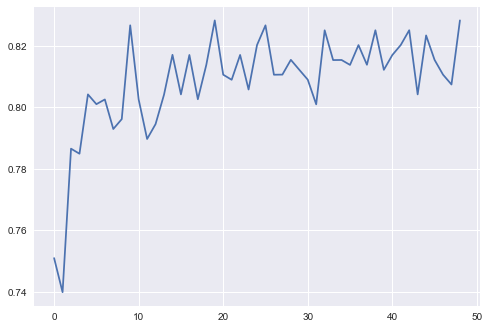

In [92]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(acc_list)
plt.stylehow()

In [93]:
print(np.argmax(acc_list))

19


In [100]:
acc=cross_val_score(RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [101]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [102]:
rf.score(X_train,Y_train)#0.8459069020866774

0.8459069020866774

In [103]:
rf.score(X_test,Y_test)#0.835820895522388

0.835820895522388